In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset

In [2]:
dataset = pd.read_csv('pd_speech_features.csv')
dataset.head(10)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
5,1,0,0.50780,0.78744,0.65451,226,221,0.007631,0.002696,0.00783,...,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1
6,2,1,0.76095,0.62145,0.54543,322,321,0.005991,0.000107,0.00222,...,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1
7,2,1,0.83671,0.62079,0.51179,318,317,0.006074,0.000136,0.00282,...,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1
8,2,1,0.80826,0.61766,0.50447,318,317,0.006057,0.000069,0.00161,...,2.2640,6.3993,4.4165,4.2662,3.6357,3.7346,2.9394,3.6216,3.8430,1
9,3,0,0.85302,0.62247,0.54855,493,492,0.003910,0.000040,0.00075,...,1.6796,2.0474,2.8117,3.5070,3.2727,3.8415,3.9439,5.8807,38.7211,1


In [99]:
dataset.shape

(756, 755)

In [3]:
features = dataset.drop(['id', 'class'], axis=1)
target = dataset['class']
dataset['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [101]:
features.shape

(756, 753)

# Feature Selection

In [4]:
from sklearn.feature_selection import SelectKBest, f_classif
new_features = SelectKBest(f_classif, k=20).fit(features, target)

In [5]:
new_dataset = pd.DataFrame({'Feature': list(features.columns), 'Scores':new_features.scores_})
new_dataset = new_dataset.sort_values(by='Scores', ascending=False)
new_dataset

,Feature,Scores
58,mean_MFCC_2nd_coef,142.506911
620,tqwt_minValue_dec_12,140.011407
584,tqwt_stdValue_dec_12,137.750103
656,tqwt_maxValue_dec_12,136.312113
583,tqwt_stdValue_dec_11,136.142253
...,...,...
350,tqwt_energy_dec_30,0.000607
685,tqwt_skewnessValue_dec_5,0.000462
343,tqwt_energy_dec_23,0.000161
339,tqwt_energy_dec_19,0.000089


In [6]:
new_features = new_features.transform(features)

In [7]:
columns = new_dataset.iloc[:20, 0].values
columns

array(['mean_MFCC_2nd_coef', 'tqwt_minValue_dec_12',
       'tqwt_stdValue_dec_12', 'tqwt_maxValue_dec_12',
       'tqwt_stdValue_dec_11', 'tqwt_entropy_log_dec_12',
       'tqwt_maxValue_dec_11', 'tqwt_minValue_dec_11',
       'tqwt_minValue_dec_13', 'std_9th_delta_delta',
       'std_8th_delta_delta', 'tqwt_maxValue_dec_13',
       'std_7th_delta_delta', 'tqwt_stdValue_dec_13',
       'std_6th_delta_delta', 'tqwt_entropy_shannon_dec_11',
       'tqwt_kurtosisValue_dec_27', 'std_8th_delta',
       'tqwt_entropy_log_dec_11', 'tqwt_TKEO_std_dec_12'], dtype=object)

In [8]:
X = pd.DataFrame(new_features, columns=columns)

In [9]:
# X = features
X

,mean_MFCC_2nd_coef,tqwt_minValue_dec_12,tqwt_stdValue_dec_12,tqwt_maxValue_dec_12,tqwt_stdValue_dec_11,tqwt_entropy_log_dec_12,tqwt_maxValue_dec_11,tqwt_minValue_dec_11,tqwt_minValue_dec_13,std_9th_delta_delta,std_8th_delta_delta,tqwt_maxValue_dec_13,std_7th_delta_delta,tqwt_stdValue_dec_13,std_6th_delta_delta,tqwt_entropy_shannon_dec_11,tqwt_kurtosisValue_dec_27,std_8th_delta,tqwt_entropy_log_dec_11,tqwt_TKEO_std_dec_12
0,2.48740,0.028115,0.014642,0.019681,0.012829,0.021703,4.8840,-229943.2967,-201985.0408,0.000059,0.005199,0.004324,0.013373,-0.026321,-0.024286,-0.048924,0.022796,0.024286,0.048924,1.5466
1,2.89860,0.022166,0.025500,0.019374,0.010645,0.020296,4.8483,-230526.8175,-203389.4678,0.000169,0.005221,0.004344,0.011184,-0.070039,-0.099695,-0.112210,0.080975,0.099695,0.112210,1.5530
2,3.22080,0.032326,0.024607,0.024819,0.016553,0.023186,1.9849,-246592.6024,-214707.2576,0.000021,0.003136,0.002657,0.008093,-0.019435,-0.026241,-0.039886,0.013810,0.026241,0.039886,1.5399
3,3.10230,0.032577,0.017274,0.016129,0.015533,0.011976,3.2053,-255107.4287,-160775.5650,0.000493,0.004537,0.016104,0.051620,-0.121640,-0.129990,-0.268930,0.111290,0.122970,0.273530,6.9761
4,2.94510,0.031989,0.013791,0.016059,0.014382,0.012686,2.7170,-252647.9964,-154087.6641,0.000328,0.003931,0.015422,0.051298,-0.078138,-0.115900,-0.227210,0.086621,0.102950,0.235860,7.8832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,-1.97830,0.032791,0.012046,0.014700,0.011600,0.014449,154.3248,-149686.6810,-84988.3760,0.010388,0.038207,0.116780,0.264650,-0.325440,-0.491410,-0.651480,0.300560,0.463150,0.646970,3.4394
752,-1.45210,0.041971,0.023391,0.019244,0.017564,0.017151,92.2915,-165485.7833,-94367.1404,0.008655,0.028332,0.095527,0.219620,-0.198620,-0.369920,-0.591670,0.136800,0.270620,0.727660,19.6733
753,-1.13730,0.029193,0.013633,0.016366,0.013659,0.015405,166.6840,-150689.8732,-102610.9065,0.010128,0.039555,0.078863,0.099272,-0.162370,-0.298120,-0.357650,0.168010,0.277380,0.348020,137.3126
754,-0.17925,0.027188,0.016464,0.015774,0.012458,0.013842,94.8016,-162249.6582,-110627.8327,0.005484,0.028243,0.059031,0.079508,-0.115310,-0.190990,-0.269840,0.116660,0.211770,0.265250,5.4425


# Standardization

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# SOM

In [11]:
from minisom import MiniSom
som = MiniSom(10, 10, input_len = 20, sigma = 1.0, learning_rate = 0.5)

In [19]:
som.pca_weights_init(X)

In [12]:
som.random_weights_init(X)

In [24]:
som._weights

array([[[-1.53099583, -0.41331554,  0.01111749, ...,  2.91994889,
          3.01417945,  0.96740701],
        [-1.29244313,  0.04371401, -0.01754465, ...,  2.33860458,
          2.35482327,  0.84067024],
        [-0.93336887,  0.23628763,  0.32382606, ...,  1.52858926,
          1.33063867, -0.06269146],
        ...,
        [-0.37627222,  0.80918246,  1.85825089, ..., -0.36129146,
         -0.31896327, -0.31803946],
        [-0.55407941,  1.55975761,  1.70661185, ..., -0.30839924,
         -0.15880323, -0.18079032],
        [-0.73058623,  1.92099579,  1.80796301, ..., -0.15307301,
          0.07299471, -0.15645136]],

       [[-1.53084305, -0.54008699, -0.41310128, ...,  2.40065856,
          2.36810549,  0.24174833],
        [-0.75316431, -0.15962992, -0.20689032, ...,  2.39176895,
          2.30974767,  0.10361755],
        [-0.71848172,  0.19057098,  0.4091139 , ...,  1.53491476,
          1.57280341, -0.26648441],
        ...,
        [-0.25489684,  0.75093133,  1.4314005 , ..., -

In [29]:
som.train_random(X, 500)

In [31]:
som._weights

array([[[-1.69573880e+00, -7.17941941e-01, -2.50624086e-01, ...,
          2.98562919e+00,  2.75278334e+00,  7.38811456e-01],
        [-1.37161605e+00, -4.60865374e-01, -4.86150662e-01, ...,
          2.39081831e+00,  1.95531239e+00,  4.98787085e-01],
        [-8.07645612e-01, -3.88850914e-01, -5.27134679e-01, ...,
          1.95440842e+00,  1.45236892e+00, -3.04935734e-02],
        ...,
        [-6.76227789e-01,  1.32393832e+00,  1.67714014e+00, ...,
         -3.59150767e-01, -3.63385217e-01, -2.20304084e-01],
        [-5.77311094e-01,  1.89066246e+00,  1.69498906e+00, ...,
         -3.94613154e-01, -3.58986957e-01, -2.98151968e-03],
        [-5.58059049e-01,  2.12363252e+00,  1.94641335e+00, ...,
         -4.82968837e-01, -4.89642618e-01, -1.74202566e-01]],

       [[-1.51185469e+00, -3.34497890e-01, -3.04700955e-01, ...,
          2.54682730e+00,  2.24925461e+00,  4.64867384e-01],
        [-1.57449567e+00, -1.75450456e-01, -5.06989900e-01, ...,
          2.35599904e+00,  2.10098809e

In [14]:
res = []
for i in X:
    res.append(som.winner(i))
len(res)

756

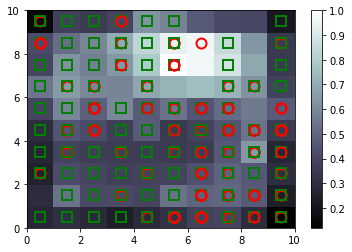

In [16]:
from pylab import bone, pcolor, colorbar, plot, show, axis
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o' , 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[target[i]],
         markeredgecolor = colors[target[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
# axis([0, som._weights.shape[0], 0, som._weights.shape[1]])
show()

In [22]:
som.get_weights()

array([[[ 0.20382853, -0.51850254,  0.73531428, ..., -0.27771624,
         -0.13737197,  0.50794362],
        [ 0.54224756, -0.05445654,  0.43662686, ...,  0.14454814,
          0.29219805,  0.60371971],
        [ 0.84185696,  0.26571596,  0.37506531, ...,  0.2577054 ,
          0.40109527,  0.56261049],
        ...,
        [ 0.44562871, -0.56750247,  0.93913486, ..., -0.44499006,
         -0.53951591, -0.72190448],
        [-0.25178698, -1.48116258,  0.40942913, ..., -0.52481651,
         -0.6029965 , -0.74355457],
        [-0.51627365, -0.83381687,  0.5330099 , ..., -0.44204105,
         -0.47874631, -0.64425064]],

       [[ 0.39476737, -0.33279992,  0.67081425, ...,  0.05884731,
          0.16406903,  0.51173225],
        [ 0.66601466,  0.18893518,  0.18189872, ...,  0.4779238 ,
          0.55290203,  0.62435087],
        [ 0.86894858,  0.34157151,  0.03088507, ...,  0.20517398,
          0.42501184,  0.57685628],
        ...,
        [ 0.36340739, -0.30200234,  0.3822582 , ..., -

In [33]:
res = []
for i in X:
    res.append(som.activate(i))
res

[array([[26.44006019, 19.82066228, 14.38133622, 14.00817913, 14.52937777,
         20.10733085, 31.96493623, 26.35046205, 28.76461745, 26.6277309 ],
        [21.72587223, 20.19012286, 16.34452054, 12.5517951 , 13.89266557,
         18.52477387, 25.69517244, 22.83556804, 24.41232167, 25.78387355],
        [17.83632587, 17.59501571, 16.61610575, 15.06480652, 17.0572957 ,
         19.29857615, 21.3033039 , 21.42844575, 24.4908236 , 23.54196555],
        [16.58691095, 16.82420344, 16.67414747, 17.25496199, 19.22818772,
         24.18947309, 22.70250569, 24.47069466, 24.29421652, 24.34240204],
        [19.02777084, 18.01623411, 18.63591941, 20.2152311 , 22.15988194,
         22.66108647, 24.28903883, 28.86888752, 29.40911372, 32.22210149],
        [26.50715662, 24.06864393, 21.49271101, 21.68759646, 22.0866968 ,
         23.25528256, 24.41229035, 36.34463754, 43.42030555, 41.3585443 ],
        [32.74422462, 27.29292849, 24.01508601, 23.10792031, 23.62095187,
         24.52836417, 25.3680085

In [16]:
mapp = som.win_map(X)

In [17]:
print(sorted(mapp, key = lambda x: x[0]))

[(0, 6), (0, 9), (0, 5), (0, 2), (0, 7), (0, 4), (0, 0), (0, 8), (0, 3), (0, 1), (1, 7), (1, 6), (1, 2), (1, 4), (1, 8), (1, 1), (1, 5), (1, 9), (1, 3), (2, 3), (2, 5), (2, 6), (2, 8), (2, 9), (2, 4), (2, 0), (2, 1), (2, 2), (2, 7), (3, 2), (3, 1), (3, 5), (3, 3), (3, 6), (3, 7), (3, 4), (3, 8), (3, 0), (4, 1), (4, 0), (4, 6), (4, 8), (4, 3), (4, 9), (4, 7), (4, 2), (4, 4), (4, 5), (5, 6), (5, 1), (5, 8), (5, 9), (5, 5), (5, 0), (5, 4), (5, 2), (5, 3), (5, 7), (6, 3), (6, 9), (6, 7), (6, 4), (6, 5), (6, 6), (6, 0), (6, 2), (6, 1), (7, 3), (7, 4), (7, 6), (7, 0), (7, 5), (7, 2), (7, 9), (7, 1), (7, 7), (7, 8), (8, 6), (8, 4), (8, 3), (8, 8), (8, 2), (8, 5), (8, 9), (8, 7), (8, 1), (9, 4), (9, 5), (9, 9), (9, 0), (9, 3), (9, 6), (9, 8), (9, 7), (9, 2), (9, 1)]


In [18]:
misuse = np.concatenate((mapp[(3,4)], mapp[(2,5)]) , axis=0)

In [19]:
misuse = scaler.inverse_transform(misuse)
misuse

array([[ 0.     ,  0.65734,  0.68605, ...,  3.4885 ,  3.7912 , 29.8935 ],
       [ 0.     ,  0.75469,  0.69588, ...,  9.594  , 10.5083 , 10.16   ],
       [ 0.     ,  0.21275,  0.77017, ...,  3.4467 ,  2.132  ,  7.7274 ],
       ...,
       [ 1.     ,  0.81419,  0.67052, ..., 20.8713 , 13.6841 , 61.0856 ],
       [ 1.     ,  0.80222,  0.65975, ...,  4.5359 ,  4.2937 , 33.4615 ],
       [ 0.     ,  0.85971,  0.67213, ..., 18.7334 , 20.8992 , 14.5305 ]])

In [35]:
def classify(som, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, target)

som = MiniSom(12, 12, 753, sigma=1.0, learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(X_train)
som.train_random(X_train, 500, verbose=False)

print(classification_report(y_test, classify(som, X_test)))
print("Accuracy : ", accuracy_score(y_test, classify(som, X_test)))
print("Precision : ", precision_score(y_test, classify(som, X_test)))
print("Recall : ", recall_score(y_test, classify(som, X_test)))

              precision    recall  f1-score   support

           0       0.53      0.49      0.51        39
           1       0.87      0.89      0.88       150

    accuracy                           0.80       189
   macro avg       0.70      0.69      0.69       189
weighted avg       0.80      0.80      0.80       189

Accuracy :  0.8042328042328042
Precision :  0.869281045751634
Recall :  0.8866666666666667
